In [79]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("drive/My Drive/Colab Notebooks")

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from nltk.tokenize import word_tokenize

In [0]:
df = pd.read_csv("input_data.csv")

In [83]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [84]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [85]:
df.shape

(8500, 4)

In [86]:
df.info

<bound method DataFrame.info of                                       Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]>

In [87]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


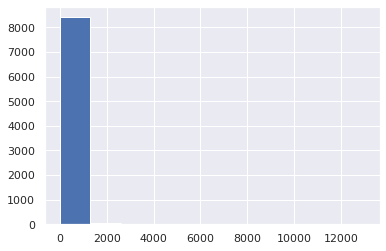

In [88]:
df['Description'].str.len().hist()

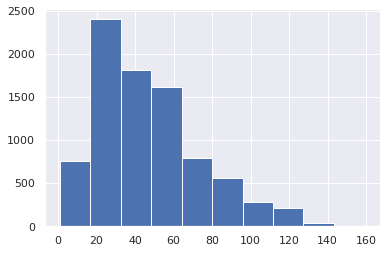

In [89]:
df['Short description'].str.len().hist()

In [90]:
print(df.isnull().sum())

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64


In [0]:
df = df.dropna()

In [53]:
print(df.isnull().sum())

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64


In [92]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (83, 4)


In [93]:
df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [0]:
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import  PorterStemmer
from string import digits 

In [0]:
def remove_html(text):
  soup = BeautifulSoup(text,'lxml')
  html_free = soup.get_text()
  return html_free

In [0]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [0]:
def remove_digits(list): 
    remove_digits = str.maketrans('', '', digits) 
    list = [i.translate(remove_digits) for i in list] 
    return list

In [98]:
df['Short description'] = remove_digits(df['Short description'])
df['Description'] = remove_digits(df['Description'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [99]:
df['Short description'] = df['Short description'].apply(lambda x: remove_punctuation(x))
df['Description'] = df['Description'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user detailsemployee manager name\r\...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from hmjdrvpbkomuaywngmailcom...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from eylqgodmybqkwiamgmailcom...,eylqgodm ybqkwiam,GRP_0
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [101]:
df['Short description'] = df['Short description'].apply(lambda x: remove_html(x))
df['Description'] = df['Description'].apply(lambda x: remove_html(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,verified user detailsemployee manager name\r\...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpbkomuaywngmailcom\r\n\r\n...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodmybqkwiamgmailcom\r\n\r\n...,eylqgodm ybqkwiam,GRP_0
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event criticalHostNamecompanycom the value of ...,event criticalHostNamecompanycom the value of ...,jyoqwxhz clhxsoqy,GRP_1
7,ticketno employment status new nonemployee en...,ticketno employment status new nonemployee en...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0


In [103]:
df['Desc_word_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df['Short_Desc_word_count'] = df['Short description'].apply(lambda x: len(str(x).split(" ")))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
df.head(10)

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_Desc_word_count
0,login issue,verified user detailsemployee manager name\r\...,spxjnwir pjlcoqds,GRP_0,29,2
1,outlook,received from hmjdrvpbkomuaywngmailcom\r\n\r\n...,hmjdrvpb komuaywn,GRP_0,23,1
2,cant log in to vpn,received from eylqgodmybqkwiamgmailcom\r\n\r\n...,eylqgodm ybqkwiam,GRP_0,9,5
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,3,3
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,9,9
6,event criticalHostNamecompanycom the value of ...,event criticalHostNamecompanycom the value of ...,jyoqwxhz clhxsoqy,GRP_1,11,10
7,ticketno employment status new nonemployee en...,ticketno employment status new nonemployee en...,eqzibjhw ymebpoih,GRP_0,9,9
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,7,7
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0,4,4


In [0]:
tokenizer = RegexpTokenizer(r'\w+')

In [108]:
df['Shot_Desc_Word_List'] = df['Short description'].apply(lambda x: tokenizer.tokenize(x))
df['Desc_Word_List'] = df['Description'].apply(lambda x: tokenizer.tokenize(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
df.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_Desc_word_count,Shot_Desc_Word_List,Desc_Word_List
0,login issue,verified user detailsemployee manager name\r\...,spxjnwir pjlcoqds,GRP_0,29,2,"[login, issue]","[verified, user, detailsemployee, manager, nam..."
1,outlook,received from hmjdrvpbkomuaywngmailcom\r\n\r\n...,hmjdrvpb komuaywn,GRP_0,23,1,[outlook],"[received, from, hmjdrvpbkomuaywngmailcom, hel..."
2,cant log in to vpn,received from eylqgodmybqkwiamgmailcom\r\n\r\n...,eylqgodm ybqkwiam,GRP_0,9,5,"[cant, log, in, to, vpn]","[received, from, eylqgodmybqkwiamgmailcom, hi,..."
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,5,5,"[unable, to, access, hrtool, page]","[unable, to, access, hrtool, page]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,3,3,"[skype, error]","[skype, error]"


In [110]:
df['Shot_Desc_Word_List'].head(20)

0                                        [login, issue]
1                                             [outlook]
2                              [cant, log, in, to, vpn]
3                    [unable, to, access, hrtool, page]
4                                        [skype, error]
5     [unable, to, log, in, to, engineering, tool, a...
6     [event, criticalHostNamecompanycom, the, value...
7     [ticketno, employment, status, new, nonemploye...
8          [unable, to, disable, add, ins, on, outlook]
9                         [ticket, update, on, inplant]
10    [engineering, tool, says, not, connected, and,...
11        [hrtool, site, not, loading, page, correctly]
12    [unable, to, login, to, hrtool, to, sgxqsuojr,...
13              [user, wants, to, reset, the, password]
14                         [unable, to, open, payslips]
15                        [ticket, update, on, inplant]
16                [unable, to, login, to, company, vpn]
17    [when, undocking, pc, screen, will, not, c

In [111]:
df['Desc_Word_List'].head(20)

0     [verified, user, detailsemployee, manager, nam...
1     [received, from, hmjdrvpbkomuaywngmailcom, hel...
2     [received, from, eylqgodmybqkwiamgmailcom, hi,...
3                    [unable, to, access, hrtool, page]
4                                        [skype, error]
5     [unable, to, log, in, to, engineering, tool, a...
6     [event, criticalHostNamecompanycom, the, value...
7     [ticketno, employment, status, new, nonemploye...
8          [unable, to, disable, add, ins, on, outlook]
9                         [ticket, update, on, inplant]
10    [engineering, tool, says, not, connected, and,...
11        [hrtool, site, not, loading, page, correctly]
12    [unable, to, login, to, hrtool, to, sgxqsuojr,...
13              [user, wants, to, reset, the, password]
14                         [unable, to, open, payslips]
15                        [ticket, update, on, inplant]
16    [received, from, xyzcompanycom, hi, i, am, una...
17    [when, undocking, pc, screen, will, not, c

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Desc_word_count,8497.0,28.872661,69.243549,1.0,6.0,11.0,26.0,1417.0
Short_Desc_word_count,8497.0,7.302460,4.322301,1.0,4.0,6.0,10.0,41.0


In [113]:
df.skew(axis = 0, skipna = True) 

Desc_word_count          10.247195
Short_Desc_word_count     1.161470
dtype: float64

In [114]:
df.isna().apply(pd.value_counts)

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_Desc_word_count,Shot_Desc_Word_List,Desc_Word_List
False,8497,8497,8497,8497,8497,8497,8497,8497
